# Backtesting, Optimising and Implementing a Combination of strategies(SMA+Bollinger Band) 

## Getting and Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import fxcmpy
import matplotlib.pyplot as plt
plt.style.use("seaborn")

## Getting data from FXCM(limit~10000 candles)

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [5]:
data = api.get_candles('BTC/USD', start = "2022-03-01", end = "2022-08-01", 
                period = "m15")
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-03-01 00:00:00,43177.3,43375.0,43607.0,43169.0,43219.0,43420.0,43654.3,43217.0,3132
2022-03-01 00:15:00,43375.0,43378.9,43402.5,43177.8,43418.0,43419.0,43442.5,43219.0,2919
2022-03-01 00:30:00,43377.9,43527.9,43540.0,43309.4,43418.0,43567.9,43581.0,43349.5,3090
2022-03-01 00:45:00,43527.4,43559.0,43716.0,43327.4,43567.4,43602.0,43759.0,43367.4,2681
2022-03-01 01:00:00,43560.0,43273.0,43622.0,43255.5,43602.0,43316.0,43665.0,43295.5,1932
...,...,...,...,...,...,...,...,...,...
2022-07-31 23:00:00,23369.3,23297.7,23369.8,23282.8,23409.3,23337.7,23409.8,23322.8,5035
2022-07-31 23:15:00,23297.7,23328.0,23352.0,23291.4,23337.7,23368.0,23392.0,23331.4,4903
2022-07-31 23:30:00,23328.1,23389.1,23450.4,23313.5,23368.1,23429.1,23490.4,23353.5,4930


## Converting to DF and saving in CSV file

In [9]:
df=pd.DataFrame(data)
df.to_csv('BTCUSD.csv')

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2020-12-01 00:00:00,19694.0,19556.0,19712.0,19469.0,19733.2,19594.6,19752.0,19508.0,29588
2020-12-01 01:00:00,19556.0,19572.0,19623.0,19431.0,19594.6,19612.0,19674.2,19459.0,27436
2020-12-01 02:00:00,19572.0,19670.0,19695.0,19533.0,19612.0,19710.0,19735.0,19573.0,21286
2020-12-01 03:00:00,19670.0,19418.0,19671.0,19335.0,19710.0,19457.0,19711.0,19374.0,18111
2020-12-01 04:00:00,19418.0,19348.0,19517.0,19343.0,19457.0,19386.7,19554.7,19380.0,23717
...,...,...,...,...,...,...,...,...,...
2022-07-27 20:00:00,22746.1,22766.1,22893.0,22661.8,22786.1,22806.1,22933.0,22701.8,18236
2022-07-27 21:00:00,22766.0,22657.0,22777.6,22568.0,22806.0,22697.0,22817.6,22608.0,17854
2022-07-27 22:00:00,22657.0,22863.4,22937.5,22635.0,22697.0,22903.4,22977.5,22675.0,18404


In [6]:
data_csv = pd.read_csv('BTCUSD_m15.csv', parse_dates = ["date"], index_col = "date")
#data_csv.rename(columns = {'bidclose':'price'}, inplace = True)
data_csv

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-03-01 00:00:00,43177.3,43375.0,43607.0,43169.0,43219.0,43420.0,43654.3,43217.0,3132
2022-03-01 00:15:00,43375.0,43378.9,43402.5,43177.8,43418.0,43419.0,43442.5,43219.0,2919
2022-03-01 00:30:00,43377.9,43527.9,43540.0,43309.4,43418.0,43567.9,43581.0,43349.5,3090
2022-03-01 00:45:00,43527.4,43559.0,43716.0,43327.4,43567.4,43602.0,43759.0,43367.4,2681
2022-03-01 01:00:00,43560.0,43273.0,43622.0,43255.5,43602.0,43316.0,43665.0,43295.5,1932
...,...,...,...,...,...,...,...,...,...
2022-07-31 23:00:00,23369.3,23297.7,23369.8,23282.8,23409.3,23337.7,23409.8,23322.8,5035
2022-07-31 23:15:00,23297.7,23328.0,23352.0,23291.4,23337.7,23368.0,23392.0,23331.4,4903
2022-07-31 23:30:00,23328.1,23389.1,23450.4,23313.5,23368.1,23429.1,23490.4,23353.5,4930


## Defining best time to trade

In [7]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10414 entries, 2022-03-01 00:00:00 to 2022-08-01 00:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   10414 non-null  float64
 1   bidclose  10414 non-null  float64
 2   bidhigh   10414 non-null  float64
 3   bidlow    10414 non-null  float64
 4   askopen   10414 non-null  float64
 5   askclose  10414 non-null  float64
 6   askhigh   10414 non-null  float64
 7   asklow    10414 non-null  float64
 8   tickqty   10414 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 813.6 KB


In [9]:
data_csv["INDTime"] = data_csv.index.tz_localize('UTC').tz_convert('Asia/Calcutta') # converting timeframe from UTC to our Indian time
data_csv["hour"] = data_csv.INDTime.dt.hour                                         # separating out hour from time
data_csv["mid"] = (data_csv["bidopen"]+data_csv["bidclose"])/2                      # getting the mid price
data_csv["price_change_abs"] = data_csv.mid.diff().abs()                            # getting change between mids
data_csv["spread"] = abs((data_csv["askclose"]-data_csv["bidclose"]))               # finding diff between ask and bid price
data_csv.dropna(inplace = True)                                                     # dropping null values
data_csv

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,INDTime,hour,mid,price_change_abs,spread
date,,,,,,,,,,,,,,
2022-03-01 00:15:00,43375.0,43378.9,43402.5,43177.8,43418.0,43419.0,43442.5,43219.0,2919,2022-03-01 05:45:00+05:30,5,43376.95,100.80,40.1
2022-03-01 00:30:00,43377.9,43527.9,43540.0,43309.4,43418.0,43567.9,43581.0,43349.5,3090,2022-03-01 06:00:00+05:30,6,43452.90,75.95,40.0
2022-03-01 00:45:00,43527.4,43559.0,43716.0,43327.4,43567.4,43602.0,43759.0,43367.4,2681,2022-03-01 06:15:00+05:30,6,43543.20,90.30,43.0
2022-03-01 01:00:00,43560.0,43273.0,43622.0,43255.5,43602.0,43316.0,43665.0,43295.5,1932,2022-03-01 06:30:00+05:30,6,43416.50,126.70,43.0
2022-03-01 01:15:00,43273.0,43272.0,43372.9,43214.0,43314.0,43313.0,43412.9,43254.0,1645,2022-03-01 06:45:00+05:30,6,43272.50,144.00,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:00:00,23369.3,23297.7,23369.8,23282.8,23409.3,23337.7,23409.8,23322.8,5035,2022-08-01 04:30:00+05:30,4,23333.50,5.20,40.0
2022-07-31 23:15:00,23297.7,23328.0,23352.0,23291.4,23337.7,23368.0,23392.0,23331.4,4903,2022-08-01 04:45:00+05:30,4,23312.85,20.65,40.0
2022-07-31 23:30:00,23328.1,23389.1,23450.4,23313.5,23368.1,23429.1,23490.4,23353.5,4930,2022-08-01 05:00:00+05:30,5,23358.60,45.75,40.0


In [10]:
by_hour = data_csv.groupby("hour")[["tickqty", "spread", "price_change_abs"]].mean() # grouping the mentioned cols in terms of hours and calculating their mean
by_hour

,tickqty,spread,price_change_abs
hour,,,
0,2298.689573,40.312796,69.143246
1,2254.435597,40.344028,69.037119
2,1390.845455,40.276136,81.728523
3,1316.598174,40.666667,57.117352
4,1616.769053,40.313395,61.596189
5,1876.993119,40.325000,58.510894
6,1849.174312,40.324083,66.231881
7,1701.692661,40.358257,65.139335
8,1603.965596,40.291743,54.970298


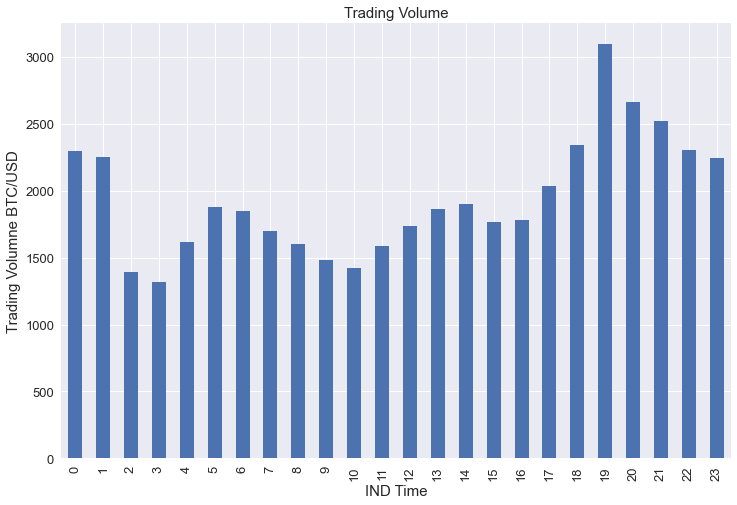

In [11]:
by_hour.tickqty.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("IND Time", fontsize = 15)
plt.ylabel("Trading Volumne BTC/USD", fontsize = 15)
plt.title("Trading Volume", fontsize = 15)
plt.show()

# Combining the trading vol hour wise of the entire dataset

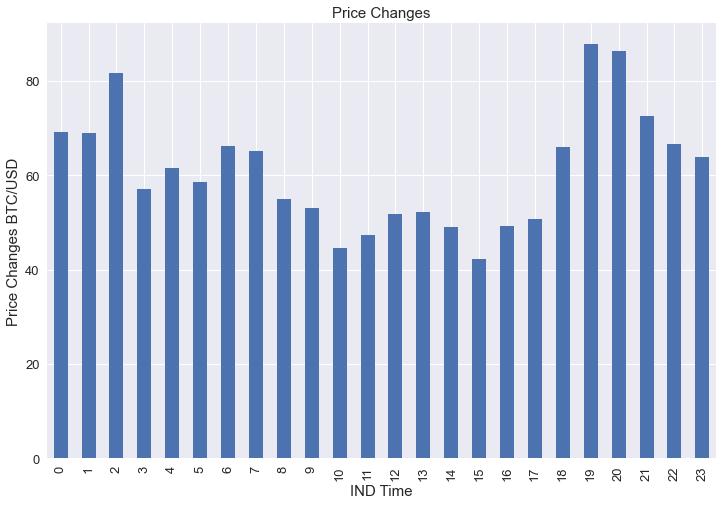

In [12]:
by_hour.price_change_abs.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("IND Time", fontsize = 15)
plt.ylabel("Price Changes BTC/USD", fontsize = 15)
plt.title("Price Changes", fontsize = 15)
plt.show()

# finding the hour which sees the maximum price change

### Hence from above two charts it is evident that the best Indian time to trade Bitcoin is between 6pm to 2am

## Now before combining both strategies we will analyze each of them individually

### Analyze SMA strategy

In [13]:
import SMA_Backtester as SMA

In [14]:
tester = SMA.SMABacktester("price", 50, 200, tc=0.00005) # starting with 50/200 SMA crossover strategy

In [15]:
tester.test_strategy() # our strategy: $1->$1.51 , buy and hold: $1->$0.98

(1.515501, 0.984391)

In [16]:
tester.results         # getting parameters of our strategy as output

,price,returns,SMA_S,SMA_L,position,strategy,trades,creturns,cstrategy
date,,,,,,,,,
2022-03-03 02:00:00,43727.0,-0.002033,43943.864,43840.2130,1,-0.002033,0.0,0.997969,0.997969
2022-03-03 02:15:00,43752.0,0.000572,43948.484,43842.0785,1,0.000572,0.0,0.998539,0.998539
2022-03-03 02:30:00,43779.0,0.000617,43950.722,43843.3340,1,0.000617,0.0,0.999156,0.999156
2022-03-03 02:45:00,43792.5,0.000308,43951.698,43844.5015,1,0.000308,0.0,0.999464,0.999464
2022-03-03 03:00:00,43718.0,-0.001703,43936.986,43846.7265,1,-0.001703,0.0,0.997763,0.997763
...,...,...,...,...,...,...,...,...,...
2022-07-31 23:00:00,23297.7,-0.003069,23752.920,23514.7980,1,-0.003069,0.0,0.531717,1.517233
2022-07-31 23:15:00,23328.0,0.001300,23739.690,23518.0080,1,0.001300,0.0,0.532408,1.519206
2022-07-31 23:30:00,23389.1,0.002616,23729.464,23521.5965,1,0.002616,0.0,0.533803,1.523185


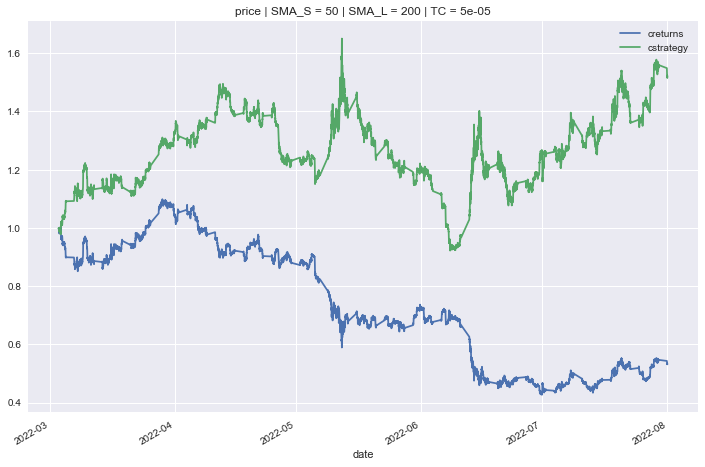

In [17]:
tester.plot_results()     # our strategy much better than buy and hold

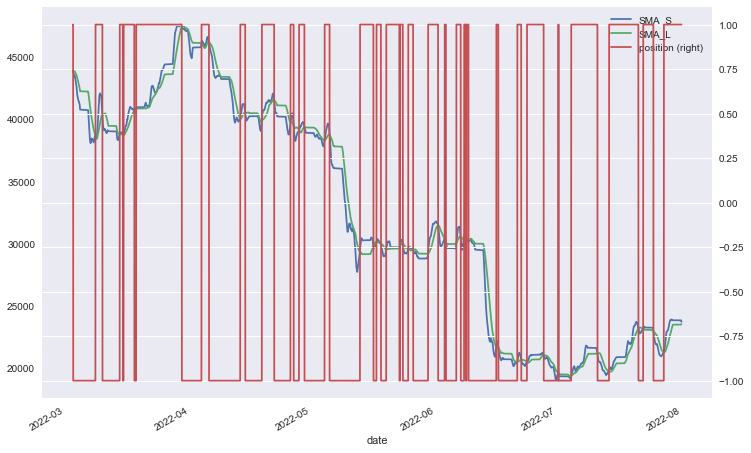

In [18]:
tester.results[["SMA_S", "SMA_L", "position"]].plot(secondary_y = "position", figsize = (12, 8))
plt.show()

# red line signifies the no of trades and position duration in that period

In [19]:
tester.results.trades.value_counts() # no of trades takes = 56

0.0    10158
2.0       56
Name: trades, dtype: int64

### Analyze Mean Reversion Strategy(Bollinger Band)

In [20]:
import MeanRev_Backtester as MeanRev

In [21]:
tester2 = MeanRev.MeanRevBacktester(symbol = "price", SMA = 75, dev = 3, tc = 0.00005)

In [22]:
tester2.test_strategy()

(0.572612, 0.041017)

In [23]:
tester2.data

,price,returns,SMA,Lower,Upper
date,,,,,
2022-03-01 00:00:00,43375.0,NaN,NaN,NaN,NaN
2022-03-01 00:15:00,43378.9,0.000090,NaN,NaN,NaN
2022-03-01 00:30:00,43527.9,0.003429,NaN,NaN,NaN
2022-03-01 00:45:00,43559.0,0.000714,NaN,NaN,NaN
2022-03-01 01:00:00,43273.0,-0.006587,NaN,NaN,NaN
...,...,...,...,...,...
2022-07-31 23:00:00,23297.7,-0.003069,23822.761333,23210.837453,24434.685214
2022-07-31 23:15:00,23328.0,0.001300,23814.554667,23180.649998,24448.459335
2022-07-31 23:30:00,23389.1,0.002616,23806.456000,23158.979657,24453.932343


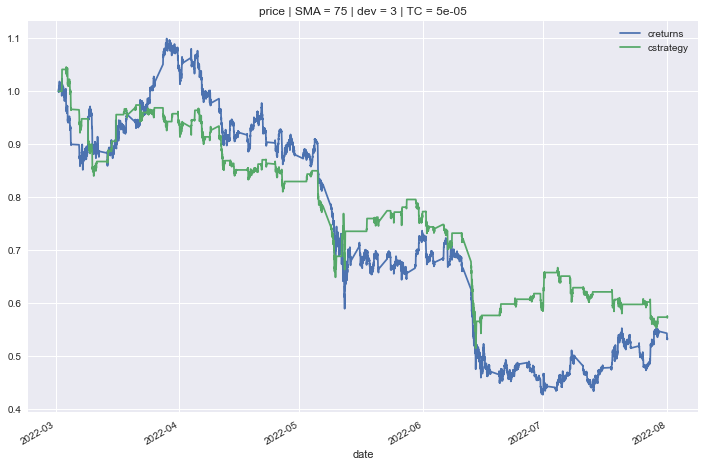

In [24]:
tester2.plot_results()

In [25]:
tester2.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
date,,,,,,,,,,,
2022-03-01 18:45:00,43819.5,0.000993,43544.857333,42258.385299,44831.329368,274.642667,0.0,0.000000,0.0,1.000994,1.000000
2022-03-01 19:00:00,43723.9,-0.002184,43549.457333,42262.846928,44836.067739,174.442667,0.0,-0.000000,0.0,0.998810,1.000000
2022-03-01 19:15:00,43984.0,0.005931,43555.538667,42260.186221,44850.891113,428.461333,0.0,0.000000,0.0,1.004751,1.000000
2022-03-01 19:30:00,43869.0,-0.002618,43559.672000,42259.775480,44859.568520,309.328000,0.0,-0.000000,0.0,1.002124,1.000000
2022-03-01 19:45:00,43727.0,-0.003242,43565.725333,42268.494823,44862.955843,161.274667,0.0,-0.000000,0.0,0.998881,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31 23:00:00,23297.7,-0.003069,23822.761333,23210.837453,24434.685214,-525.061333,1.0,-0.003069,0.0,0.532203,0.573267
2022-07-31 23:15:00,23328.0,0.001300,23814.554667,23180.649998,24448.459335,-486.554667,1.0,0.001300,0.0,0.532895,0.574012
2022-07-31 23:30:00,23389.1,0.002616,23806.456000,23158.979657,24453.932343,-417.356000,1.0,0.002616,0.0,0.534290,0.575516


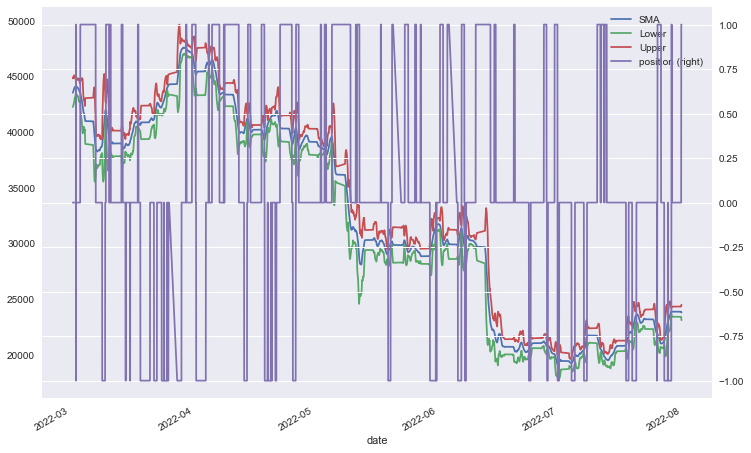

In [26]:
tester2.results[["SMA","Lower","Upper","position"]].plot(secondary_y = "position", figsize = (12, 8))
plt.show()

## Combining both Strategies

__Two different Methods:__

__Strategy 1__ (pro: strong signals | con: restrictive / doesn´t work with too many Indicators)
- Go Long if all Signals are long
- Go Short if all Signals are short
- Go Neutral if Signals are nonunanimous 

__Strategy 2__ (pro: can be customized | con: more trades / weaker signals)
- Go Long if sum of both the  Signals > 0 (1+1 / 1+0/ 0+1)
- Go Short if sum of both the  Signals < 0 (-1-1 / -1+0/ 0-1)
- Go Neutral if sum of both the   Signals = 0

## Strategy1

In [30]:
import SMA_Backtester as SMA
import MeanRev_Backtester as MeanRev

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
from scipy.optimize import minimize
plt.style.use("seaborn")

In [32]:
def optimal_strategy(parameters):
    
    symbol = "price"
    tc = 0.00005
    
    # SMA
    tester1 = SMA.SMABacktester(symbol, int(parameters[0]), int(parameters[1]), tc)
    tester1.test_strategy()
    
    # Bollinger
    tester2 = MeanRev.MeanRevBacktester(symbol,  int(parameters[2]),  int(parameters[3]), tc)
    tester2.test_strategy()
    
    # Create comb
    comb = tester1.results.loc[:, ["returns", "position"]].copy()
    comb.rename(columns = {"position":"position_SMA"}, inplace = True)
    comb["position_MR"] = tester2.results.position
    
    # 2 Methods
    comb["position_comb"] = np.where(comb.position_MR == comb.position_SMA, comb.position_MR, 0) 
    #comb["position_comb"] = np.sign(comb.position_MR + comb.position_SMA)
    
    # Backtest
    comb["strategy"] = comb["position_comb"].shift(1) * comb["returns"]
    comb.dropna(inplace=True)
    comb["trades"] = comb.position_comb.diff().fillna(0).abs()
    comb.strategy = comb.strategy - comb.trades * tc
    comb["creturns"] = comb["returns"].cumsum().apply(np.exp)
    comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)
    
    return -comb["cstrategy"].iloc[-1] # negative absolute performance to be minimized

# this function optimises our strategy

In [33]:
bnds =  ((5, 75), (20, 200), (10, 100), (1, 5))
start_par = (5, 20, 10, 1)
opts = minimize(optimal_strategy, start_par, method = "Powell" , bounds = bnds)
opts

# finding the best parameters for Strategy 1

   direc: array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
     fun: -1.0145117336128733
 message: 'Optimization terminated successfully.'
    nfev: 97
     nit: 1
  status: 0
 success: True
       x: array([ 5.53936656, 88.09209138, 43.64524116,  3.47219573])

In [34]:
# class for backtesting strategy1

class CombStrategy():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, SMA, dev, tc):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        '''
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.SMA = SMA
        self.dev = dev
        self.tc = tc
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {} )".format(self.symbol, self.SMA_S, self.SMA_L)
        
    def get_data(self):
        ''' Imports the data from BTCUSD.csv (source can be changed).
        '''
        raw = pd.read_csv("BTCUSD_m15.csv", parse_dates = ["date"], index_col = "date", usecols = ['date','bidclose'])
        raw.rename(columns = {'bidclose':'price'}, inplace = True)
        raw = raw[self.symbol].to_frame().dropna()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        raw["SMA"] = raw["price"].rolling(self.SMA).mean()
        raw["Lower"] = raw["SMA"] - raw["price"].rolling(self.SMA).std() * self.dev
        raw["Upper"] = raw["SMA"] + raw["price"].rolling(self.SMA).std() * self.dev
        self.data = raw
        return raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None, SMA = None, dev = None):
        ''' Updates SMA parameters and the prepared dataset.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
        if SMA is not None:
            self.SMA = SMA
            self.data["SMA"] = self.data["price"].rolling(self.SMA).mean()
            self.data["Lower"] = self.data["SMA"] - self.data["price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["price"].rolling(self.SMA).std() * self.dev
        if dev is not None:
            self.dev = dev
            self.data["Lower"] = self.data["SMA"] - self.data["price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["price"].rolling(self.SMA).std() * self.dev
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position1"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position1"].shift(1) * data["returns"]
        data["position1"] = data.position1.ffill().fillna(0)
        data["distance"] = data.price - data.SMA
        data["position2"] = np.where(data.price < data.Lower, 1, np.nan)
        data["position2"] = np.where(data.price > data.Upper, -1, data["position2"])
        data["position2"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position2"])
        data["position2"] = data.position2.ffill().fillna(0)
        data["position3"] = np.where(data.position1 == data.position2, data.position1, 0)
        #data["position3"] = np.sign(data.position1 + data.position2)
        data["strategy"] = data.position3.shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position3.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {} | SMA = {} | dev = {} | TC = {}".format(self.symbol, self.SMA_S, self.SMA_L, self.SMA, self.dev, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [35]:
test_strategy1 = CombStrategy(symbol="price", SMA_S= 6, SMA_L=88, SMA=44, dev=3.47, tc=0.00005) # testing with best optimised values

In [36]:
test_strategy1.test_strategy() # our strategy : $1 -> $0.97 , buy and hold : $1 -> $ 0.53 | our strategy much better and stable than buy and hold

(0.971298, 0.44097)

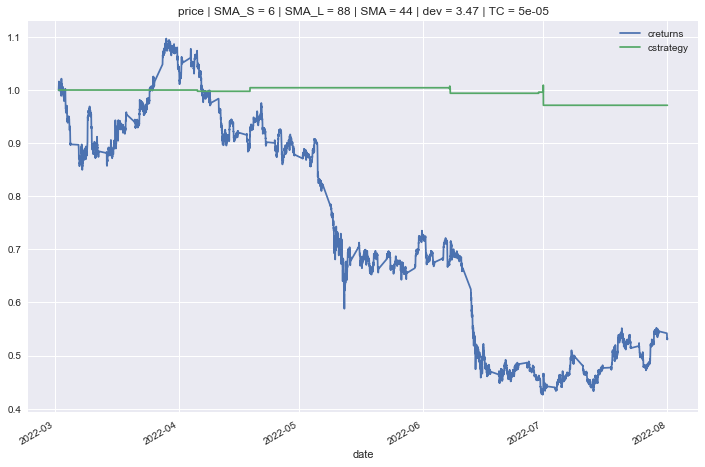

In [37]:
test_strategy1.plot_results()

In [38]:
test_strategy1.results.trades.value_counts() # only 10 trades taken

0.0    10316
1.0       10
Name: trades, dtype: int64

## Strategy2

In [39]:
def optimal_strategy(parameters):
    
    symbol = "price"
    tc = 0.00005
    
    # SMA
    tester1 = SMA.SMABacktester(symbol, int(parameters[0]), int(parameters[1]), tc)
    tester1.test_strategy()
    
    # Bollinger
    tester2 = MeanRev.MeanRevBacktester(symbol,  int(parameters[2]),  int(parameters[3]), tc)
    tester2.test_strategy()
    
    # Create comb
    comb = tester1.results.loc[:, ["returns", "position"]].copy()
    comb.rename(columns = {"position":"position_SMA"}, inplace = True)
    comb["position_MR"] = tester2.results.position
    
    # 2 Methods
    #comb["position_comb"] = np.where(comb.position_MR == comb.position_SMA, comb.position_MR, 0) 
    comb["position_comb"] = np.sign(comb.position_MR + comb.position_SMA)
    
    # Backtest
    comb["strategy"] = comb["position_comb"].shift(1) * comb["returns"]
    comb.dropna(inplace=True)
    comb["trades"] = comb.position_comb.diff().fillna(0).abs()
    comb.strategy = comb.strategy - comb.trades * tc
    comb["creturns"] = comb["returns"].cumsum().apply(np.exp)
    comb["cstrategy"] = comb["strategy"].cumsum().apply(np.exp)
    
    return -comb["cstrategy"].iloc[-1] # negative absolute performance to be minimized

# this function optimises our strategy

In [40]:
bnds =  ((5, 75), (20, 200), (10, 100), (1, 5))
start_par = (5, 20, 10, 1)
opts = minimize(optimal_strategy, start_par, method = "Powell" , bounds = bnds)
opts

# finding the best parameters for Strategy 2

   direc: array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
     fun: -1.8020878596292877
 message: 'Optimization terminated successfully.'
    nfev: 300
     nit: 3
  status: 0
 success: True
       x: array([ 53.45570833, 109.09475214,  31.24617595,   2.52792754])

In [41]:
# class for backtesting strategy2

class CombStrategy():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, SMA, dev, tc):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        '''
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.SMA = SMA
        self.dev = dev
        self.tc = tc
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {} )".format(self.symbol, self.SMA_S, self.SMA_L)
        
    def get_data(self):
        ''' Imports the data from BTCUSD.csv (source can be changed).
        '''
        raw = pd.read_csv("BTCUSD_m15.csv", parse_dates = ["date"], index_col = "date", usecols = ['date','bidclose'])
        raw.rename(columns = {'bidclose':'price'}, inplace = True)
        raw = raw[self.symbol].to_frame().dropna()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean()
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        raw["SMA"] = raw["price"].rolling(self.SMA).mean()
        raw["Lower"] = raw["SMA"] - raw["price"].rolling(self.SMA).std() * self.dev
        raw["Upper"] = raw["SMA"] + raw["price"].rolling(self.SMA).std() * self.dev
        self.data = raw
        return raw
        
    def set_parameters(self, SMA_S = None, SMA_L = None, SMA = None, dev = None):
        ''' Updates SMA parameters and the prepared dataset.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
        if SMA is not None:
            self.SMA = SMA
            self.data["SMA"] = self.data["price"].rolling(self.SMA).mean()
            self.data["Lower"] = self.data["SMA"] - self.data["price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["price"].rolling(self.SMA).std() * self.dev
        if dev is not None:
            self.dev = dev
            self.data["Lower"] = self.data["SMA"] - self.data["price"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["price"].rolling(self.SMA).std() * self.dev
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position1"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position1"].shift(1) * data["returns"]
        data["position1"] = data.position1.ffill().fillna(0)
        data["distance"] = data.price - data.SMA
        data["position2"] = np.where(data.price < data.Lower, 1, np.nan)
        data["position2"] = np.where(data.price > data.Upper, -1, data["position2"])
        data["position2"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position2"])
        data["position2"] = data.position2.ffill().fillna(0)
        #data["position3"] = np.where(data.position1 == data.position2, data.position1, 0)
        data["position3"] = np.sign(data.position1 + data.position2)
        data["strategy"] = data.position3.shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position3.diff().fillna(0).abs()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {} | SMA = {} | dev = {} | TC = {}".format(self.symbol, self.SMA_S, self.SMA_L, self.SMA, self.dev, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [42]:
test_strategy2 = CombStrategy(symbol="price", SMA_S= 53, SMA_L=109, SMA=31, dev=2.52, tc=0.00005) # testing with best optimised values

In [44]:
test_strategy2.test_strategy() # our strategy : $1 -> $1.71 , buy and hold : $1 -> $ 0.53 | our strategy much better than buy and hold

(1.712942, 1.187178)

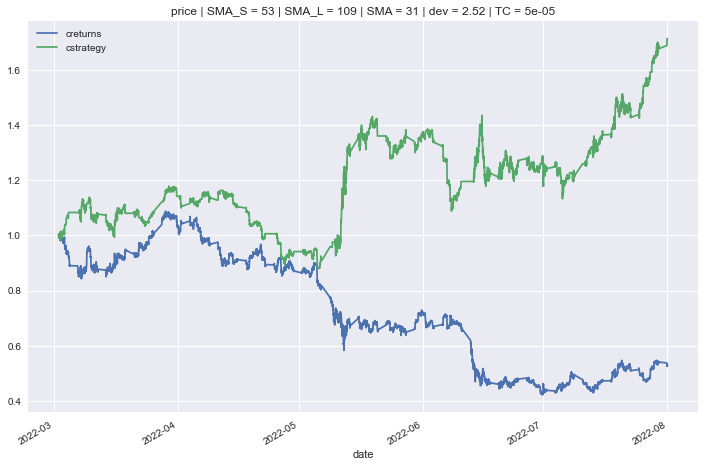

In [45]:
test_strategy2.plot_results()

In [46]:
test_strategy2.results.trades.value_counts() # 56 long, 279 short positions taken by this strategy

0.0    9970
1.0     279
2.0      56
Name: trades, dtype: int64




## Implementing Strategy 2 in FXCM

In [1]:
import pandas as pd
import numpy as np
import fxcmpy
from datetime import datetime, timedelta
import time

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [12]:
datetime.utcnow().time()

datetime.time(11, 10, 24, 355871)

In [15]:
pd.to_datetime("11:15").time() # desired end of trading session (in utc time)-> 2am indian local time

datetime.time(11, 15)

In [16]:
if datetime.utcnow().time() >= pd.to_datetime("11:15").time():
    print("Stop the Trading Session!")

In [17]:
class Trader():
    
    def __init__(self, instrument, bar_length, SMA, dev, SMA_S, SMA_L, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None 
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.SMA = SMA
        self.dev = dev
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ", flush = True)
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df = df.append(self.tick_data.iloc[-1]) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["SMA_S"] = df[self.instrument].rolling(self.SMA_S).mean()
        df["SMA_L"] = df[self.instrument].rolling(self.SMA_L).mean()
        df["SMA"] = df[self.instrument].rolling(self.SMA).mean()
        df["Lower"] = df["SMA"] - df[self.instrument].rolling(self.SMA).std() * self.dev
        df["Upper"] = df["SMA"] + df[self.instrument].rolling(self.SMA).std() * self.dev
        df["distance"] = df.self.instrument - df.SMA
        df["Lower"] = df["SMA"] - df[self.instrument].rolling(self.SMA).std() * self.dev
        df["Upper"] = df["SMA"] + df[self.instrument].rolling(self.SMA).std() * self.dev
        df.dropna(inplace = True)
        
        
        #determine positions
        df = df.loc[self.start_time:].copy() # starting with first live_stream bar (removing historical bars)
        df["position_SMA"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1 )
        df["position_BB"] = np.where(df.self.instrument < df.Lower, 1, np.nan)
        df["position_BB"] = np.where(df.self.instrument > df.Upper, -1, df["position_BB"])
        df["position_BB"] = np.where(df.distance * df.distance.shift(1) < 0, 0, df["position_BB"])

        df["position_comb"] = np.sign(df.position_MR + df.position_SMA)
        df["position_comb"] = df.position.ffill().fillna(0) # start with neutral position if no strong signal
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position_comb"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position_comb"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position_comb"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")

In [18]:
trader = Trader("BTC/USD", bar_length = "5min",SMA = 31, dev = 2.52, SMA_S = 53, SMA_L = 109, units = 100)

In [19]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

In [20]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

637 638 639 

In [21]:
trader.data

In [22]:
api.close()